# Hackaton Santander

## Objetivo
### O código a seguir tem como finalidade encontrar caracteristicas que se destaquem no publico alvo afim de definirmos uma persona para o nosso problema

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as stats

## Base de dados

Os dados a seguir foram extraidos do IBGE: https://www.ibge.gov.br/estatisticas/sociais/trabalho/27946-divulgacao-semanal-pnadcovid1.html?=&t=downloads
Base utilizada foi: PNAD_COVID_062020.xlsx

In [3]:
df = pd.read_excel('BASE_PERSONA.xlsx')

In [4]:
df.shape

(270, 16)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,Situação do domicílio,Tipo de área,Condição no domicílio,Idade do morador,Sexo,Cor ou raça,Escolaridade,trabalhou ou fez algum bico?,Tem mais de um trabalho,No trabalho qual sua posição?,"Quantas horas, por semana, trabalhava?",Recebia/retirava normalmente em dinheiro,Valor em dinheiro,Valor em dinheiro sacado,O(A) Sr(a) contribui para o INSS?,Este domicílio é:
0,1,1,1,78,1,1,5,1,2,7,40,1.0,10000.0,10000.0,1,1
1,1,1,1,36,2,4,5,2,2,7,50,1.0,13000.0,0.0,2,3
2,1,1,2,61,2,1,3,1,2,7,40,1.0,2100.0,1500.0,1,1
3,1,1,2,55,1,3,7,1,2,7,40,1.0,2000.0,0.0,2,3
4,1,1,2,45,2,1,5,1,2,7,40,1.0,2250.0,0.0,1,1


### Tratamento de dados

In [7]:
df.isna().sum().sort_values(ascending=False)

Valor em dinheiro sacado                    8
Valor em dinheiro                           8
Recebia/retirava normalmente em dinheiro    8
Este domicílio é:                           0
O(A) Sr(a) contribui para o INSS?           0
Quantas horas, por semana, trabalhava?      0
No trabalho qual sua posição?               0
Tem mais de um trabalho                     0
trabalhou ou fez algum bico?                0
Escolaridade                                0
Cor ou raça                                 0
Sexo                                        0
Idade do morador                            0
Condição no domicílio                       0
Tipo de área                                0
Situação do domicílio                       0
dtype: int64

In [8]:
df['Recebia/retirava normalmente em dinheiro'].unique()

array([ 1., nan])

In [8]:
df['Recebia/retirava normalmente em dinheiro'].fillna(0, inplace=True)
df['Valor em dinheiro'].fillna(0, inplace=True)
df['Valor em dinheiro sacado'].fillna(0, inplace=True)

Como as demais informações estão preenchidas podemos subentender que a ausência de informação caracteriza um valor de recebimento ou saque igual a zero.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Situação do domicílio                     270 non-null    int64  
 1   Tipo de área                              270 non-null    int64  
 2   Condição no domicílio                     270 non-null    int64  
 3   Idade do morador                          270 non-null    int64  
 4   Sexo                                      270 non-null    int64  
 5   Cor ou raça                               270 non-null    int64  
 6   Escolaridade                              270 non-null    int64  
 7   trabalhou ou fez algum bico?              270 non-null    int64  
 8   Tem mais de um trabalho                   270 non-null    int64  
 9   No trabalho qual sua posição?             270 non-null    int64  
 10  Quantas horas, por semana, trabalhava?

### Feature Engineering

##### Agrupamento da escolaridade
* 1	- Sem instrução;
* 2	- Fundamental incompleto;
* 3	- Fundamental completa;
* 4	- Médio incompleto;
* 5	- Médio completo.

In [10]:
df['Escolaridade'] = df['Escolaridade'].apply(lambda x: 5 if x in {1, 2, 3, 4, 5} else x)

##### Transformação do atributo, removendo a capital da variável categórica 4 para deixá-la apenas com os dados do interior:
* 1	- Capital;
* 2	- Resto da RM (Região Metropolitana, excluindo a capital);
* 3	- Resto da RIDE (Região Integrada de Desenvolvimento Econômico, excluindo a capital) ;
* 4	- Resto da UF  (Unidade da Federação, excluindo a região metropolitana e a RIDE).

##### Característica Geográfica:
   * Capital - 1521.11 km²
   * Região Metropolitana - 7946.84 km²
   * Interior - 240262.59 km²

In [11]:
df['Localização'] = df['Tipo de área'].apply(lambda x: round(1521.11/df.where(df['Tipo de área'] == 1)['Tipo de área'].count()) if x == 1 else
                                            (round(7946.84/df.where(df['Tipo de área'] == 2)['Tipo de área'].count()) if x == 2 else 
                                            (round(240262.59/df.where(df['Tipo de área'] == 4)['Tipo de área'].count())
                                                          )))

##### Razão de comércios Capital x Interior

In [12]:
qtd_capital_km2 = 1521.11/df.where(df['Tipo de área'] == 1)['Tipo de área'].count()
qtd_interior_km2 = 240262.59/df.where(df['Tipo de área'] == 4)['Tipo de área'].count()
qtd_interior_km2/qtd_capital_km2

60.60954469754569

Capital possui uma concentração 57x maior de comercios do segmento de lojas e atacado

### Analisando Variáveis Contínuas

In [13]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sn.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('quantils')

    # boxplot
    plt.subplot(1, 3, 3)
    sn.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

#### Analisando a distribuição da Idade do morador

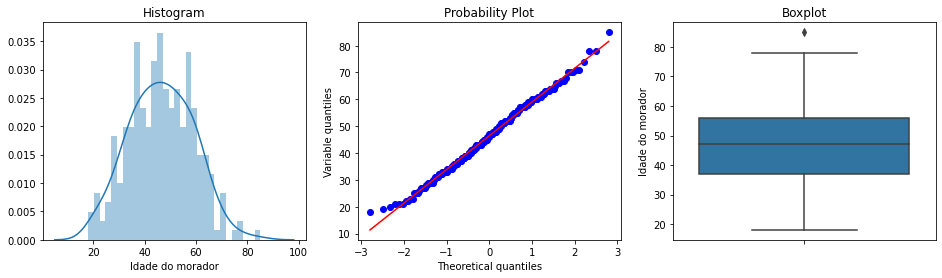

In [14]:
diagnostic_plots(df, 'Idade do morador')

#### Analisando a distribuição da quantidade de horas trabalhadas por semana

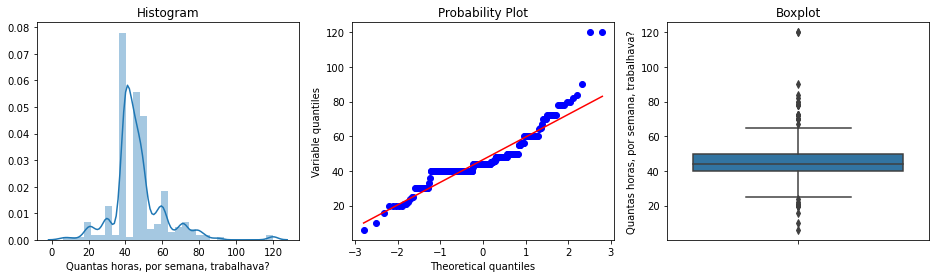

In [15]:
diagnostic_plots(df, 'Quantas horas, por semana, trabalhava?')

#### Analisando a distribuição do valor recebido em dinheiro

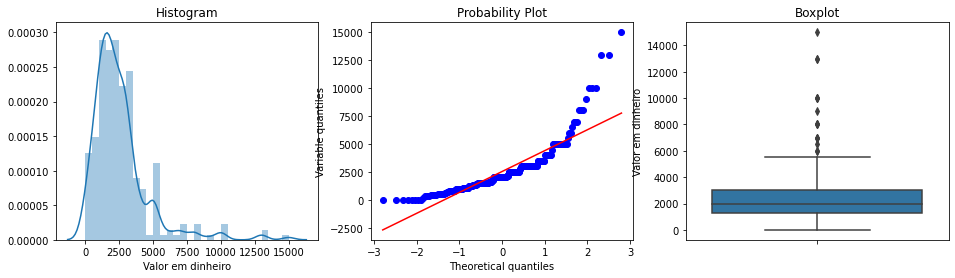

In [16]:
diagnostic_plots(df, 'Valor em dinheiro')

#### Analisando a distribuição do valor sacado em dinheiro

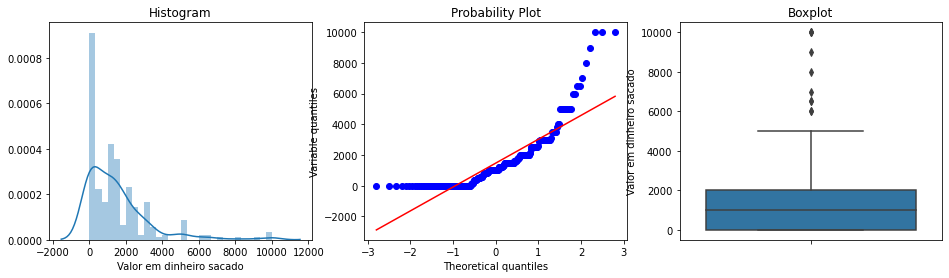

In [17]:
diagnostic_plots(df, 'Valor em dinheiro sacado')

### Analisando a distribuição da Idade do morador

In [18]:
num = ['Idade do morador','Quantas horas, por semana, trabalhava?','Valor em dinheiro','Valor em dinheiro sacado']
df[num].describe()

,Idade do morador,"Quantas horas, por semana, trabalhava?",Valor em dinheiro,Valor em dinheiro sacado
count,270.000000,270.000000,270.000000,270.000000
mean,46.459259,46.511111,2532.933333,1473.155556
std,12.489855,13.988507,2114.921656,1772.309265
min,18.000000,6.000000,0.000000,0.000000
25%,37.000000,40.000000,1300.000000,0.000000
50%,47.000000,44.000000,2000.000000,1000.000000
75%,56.000000,50.000000,3000.000000,2000.000000
max,85.000000,120.000000,15000.000000,10000.000000


### Analisando Variáveis Categóricas

##### Variável - Situação do domicilio
* 1	- Urbana
* 2 - Rural

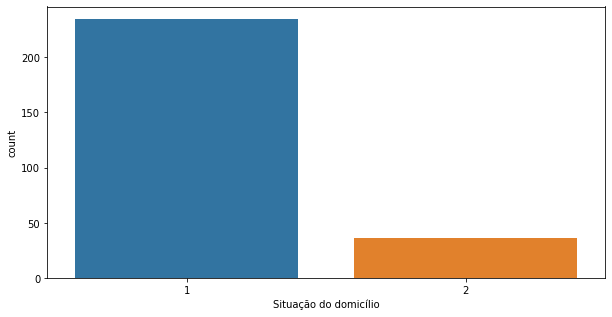

In [49]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'Situação do domicílio', data = df)

#####  Variável - Tipo de área
* 1	- Capital
* 2 - Resto da RM (Região Metropolitana, excluindo a capital)
* 4 - Resto da UF

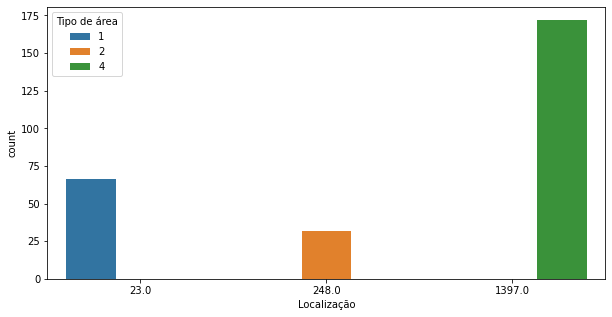

In [37]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'Localização', hue='Tipo de área', data = df)

##### Variável - Condição no domicílio
* 1	- Pessoa responsável pelo domicílio
* 2 - Cônjuge ou companheiro(a) de sexo diferente
* 4 - Filho(a) do responsável e do cônjuge
* 5 - Filho(a) somente do responsável
* 6 - Filho(a) somente do cônjuge
* 7 - Genro ou nora
* 8 - Pai, mãe, padastro ou madastra
* 10 - Neto(a)
* 12 - Irmão ou irmã
* 14 - Outro parente
* 16 - Convivente - Não parente que compartilha despesas

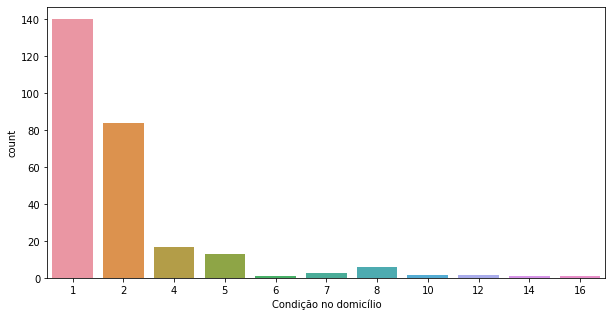

In [38]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'Condição no domicílio', data = df)

##### Variável - Sexo
* 1 - Homem
* 2 - Mulher

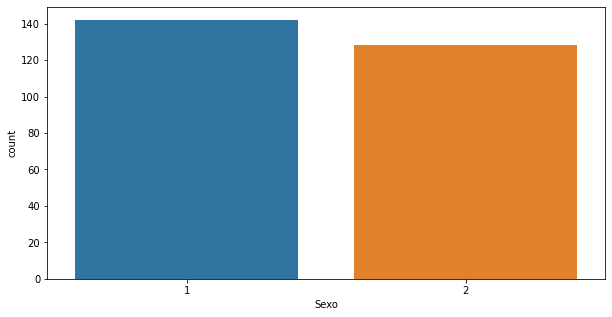

In [39]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'Sexo', data = df)

##### Variável - Cor ou raça
* 1 - Branca
* 2 - Preta
* 3 - Amarela
* 4 - Parda

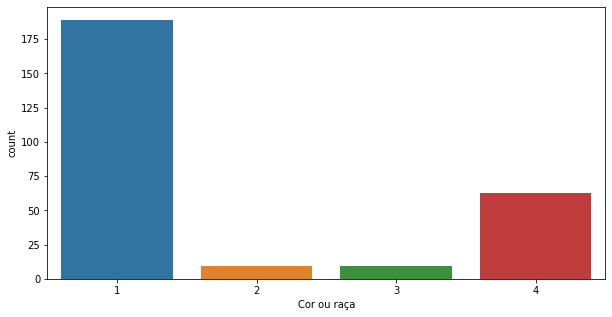

In [40]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'Cor ou raça', data = df)

##### Variável - Escolaridade
* 5 - Médio completo
* 6 - Superior incompleto
* 7 - Superior completo
* 8 - Pós-graduação, mestrado ou doutorado

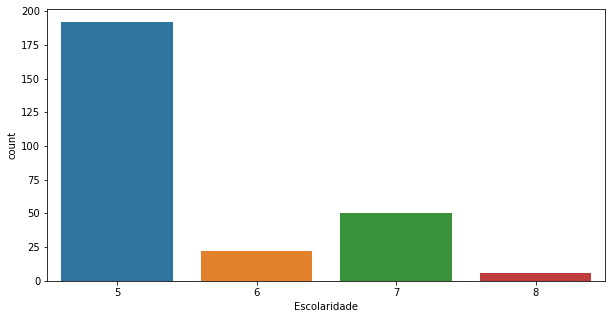

In [41]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'Escolaridade', data = df)

##### Variável - trabalhou ou fez algum bico?
* 1 - Sim
* 2 - Não

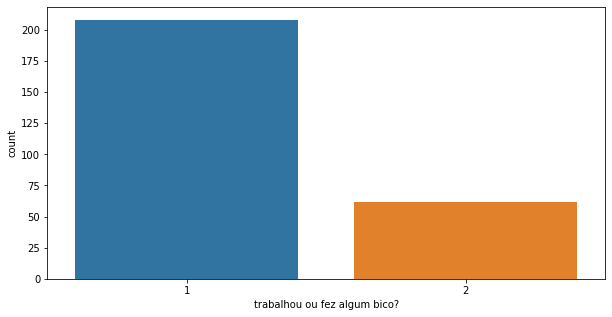

In [42]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'trabalhou ou fez algum bico?', data = df)

##### Variável - Tem mais de um trabalho
* 1 - Sim
* 2 - Não

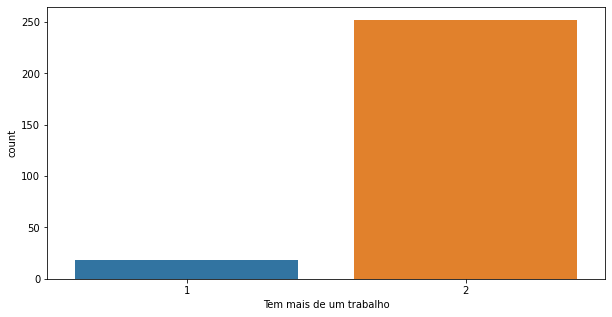

In [43]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'Tem mais de um trabalho', data = df)

##### Variável - No trabalho qual sua posição?
* 6 - Empregador
* 7 - Conta Própria
* 8 - Trabalhador familiar não remunerado em ajuda a membro do domicílio ou parente

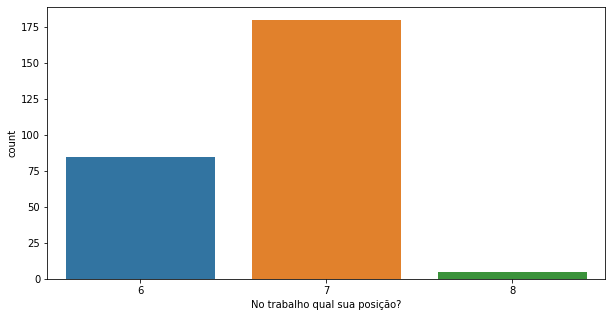

In [45]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'No trabalho qual sua posição?', data = df)

##### Variável - Recebia/retirava normalmente em dinheiro
* 1 - Em dinheiro

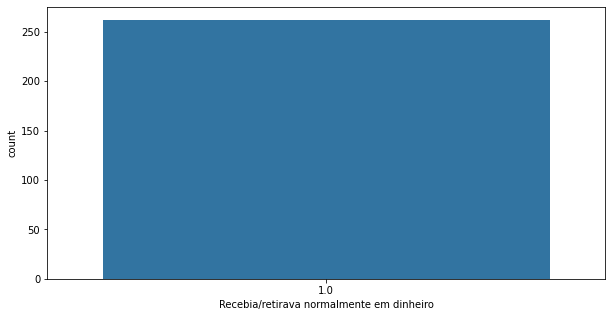

In [46]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'Recebia/retirava normalmente em dinheiro', data = df)

##### Variável - O(A) Sr(a) contribui para o INSS?
* 1 - Sim
* 2 - Não

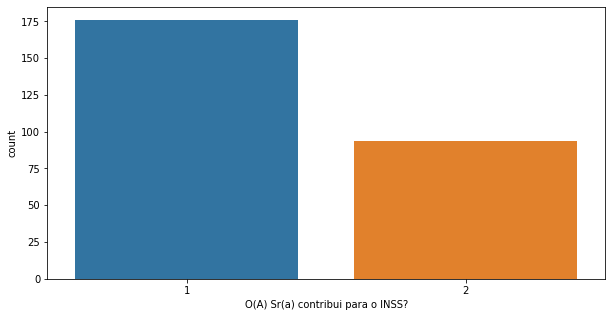

In [47]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'O(A) Sr(a) contribui para o INSS?', data = df)

##### Variável - Este domicílio é:
* 1 - Próprio - já pago
* 2 - Próprio - ainda pagando
* 3 - Alugado
* 4 - Cedido por empregador
* 5 - Cedido por familiar
* 6 - Cedido de outra forma
* 7 - Outra condição

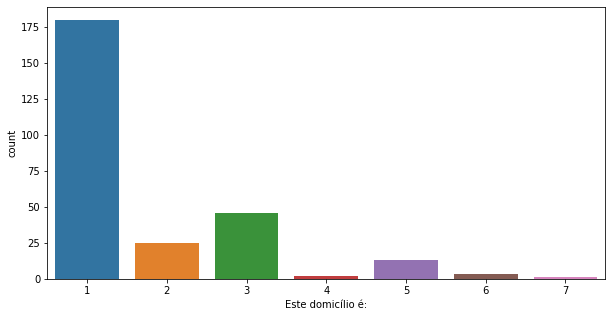

In [48]:
plt.figure(figsize = (10,5))
sn.countplot(x = 'Este domicílio é:', data = df)

Com o resultado dessa análise já conseguimos definir uma persona do nosso problema.